Скрипт позволяет повернуть данные и обрезать их по времени. Также здесь есть заготовки для других скриптов.

In [ ]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [9]:
#file = 'normalized_orig_trc\\12.trc'
file = 'smoothed_trc\\3_shifted_smoothed.trc'

In [10]:
#Все маркеры
markers = ['RAH', 'RPH', 'LAH', 'LPH', 'C7', 'T8', 'IJ', 'PX','RSC', 'RAC','LSC', 'LAC', 'RAI', 'RPC',
           'RTS', 'RAA', 'LAI', 'LTS', 'LAA', 'LPC', 'REM', 'REL', 'LEM', 'LEL', 'RRS', 'RUS', 'LRS', 'LUS', 'LSJ', 'RSJ']
#Маркеры, условно неподвижные относительно тела
stablemarkers = ['T8', 'IJ', 'PX', 'C7']
#Маркеры лопатки
markersscap = ['RTS', 'RAI', 'RAA']
#Хранит названия колонок в списке
cols = []
stablecols = []
scapulacols = []
#Хранит названия колонок в строке
csvcols = ''
for i in markers:
    cols.append(i + 'x')
    cols.append(i + 'y')
    cols.append(i + 'z')
    csvcols += cols[-3] + '\t' + cols[-2] + '\t' + cols[-1] + '\t'
for i in stablemarkers:
    stablecols.append(i + 'x')
    stablecols.append(i + 'y')
    stablecols.append(i + 'z')
for i in markersscap:
    scapulacols.append(i + 'x')
    scapulacols.append(i + 'y')
    scapulacols.append(i + 'z')

In [6]:
#Data from original file
datalines = []
with open (file, 'r') as fp:
    datalines = fp.readlines()
    infolines = datalines[0:5]
    #infolines[1].replace('NumFrames', 'NumFrame', 1)
    #infolines[1].replace('NumMarkers', 'NumMarker', 1)
    datalines = datalines[5:-1]
textdatalines = ''
textinfodatalines = ''
for i in datalines:
    textdatalines += i + '\n'

In [17]:
#df хранит данные оригинального файла
df = pd.read_csv(StringIO(textdatalines), sep = '\t', names = ['Frame#', 'Time'] + cols)

In [18]:
#df1 хранит модифицированные данные. Здесь происходит обрезание по времени
df1 = df[df['Time'] <= 12]
df1 = df1[df1['Time'] >= 10]

In [123]:
df2 = df1.copy()

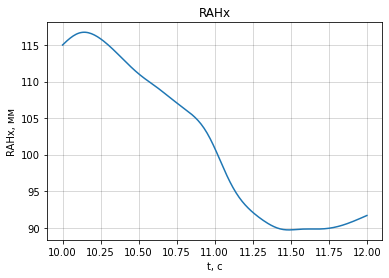

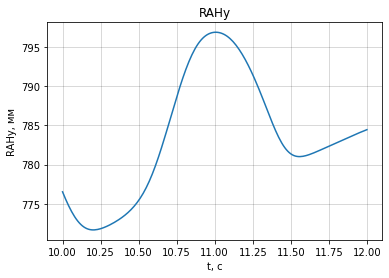

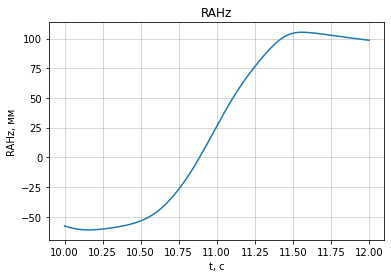

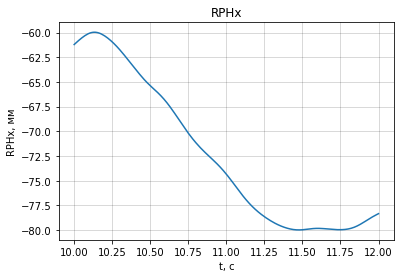

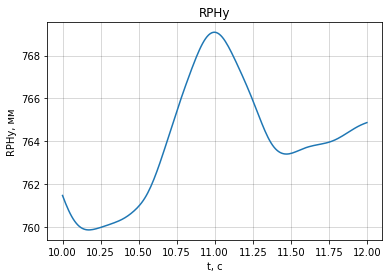

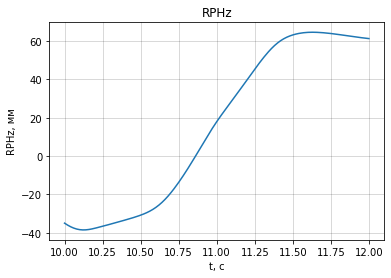

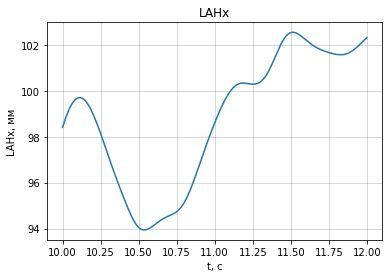

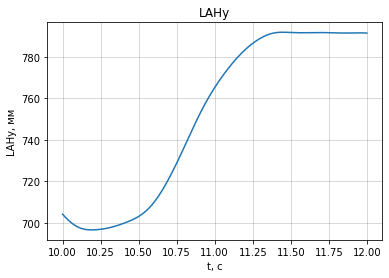

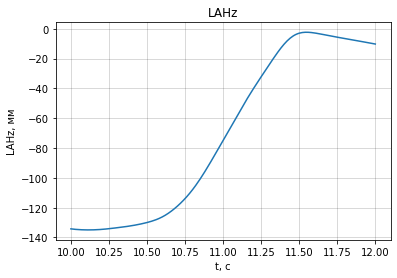

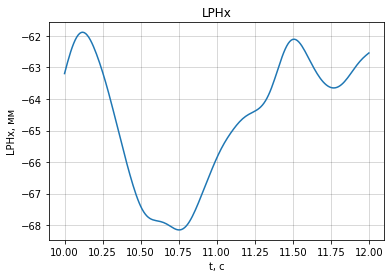

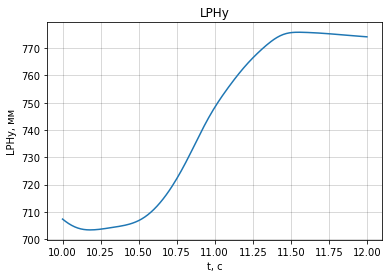

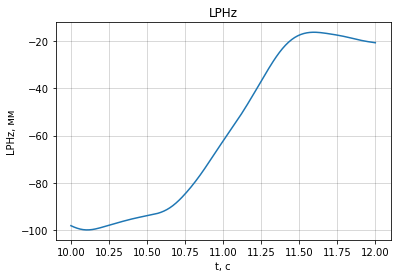

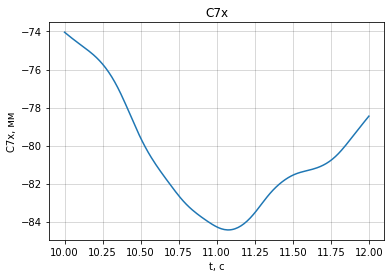

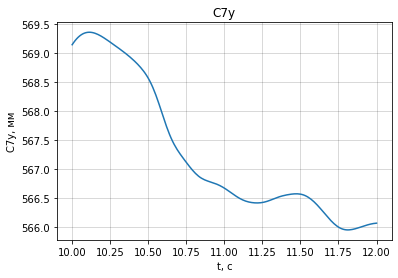

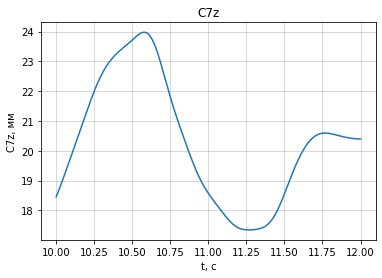

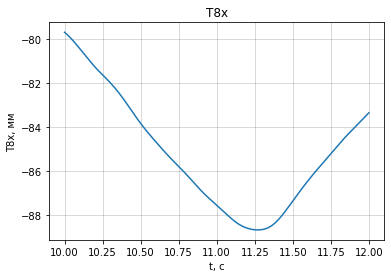

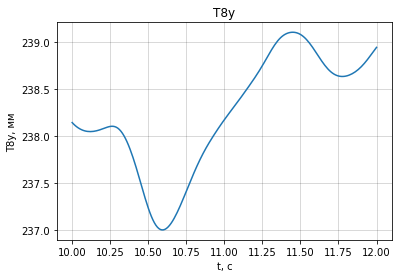

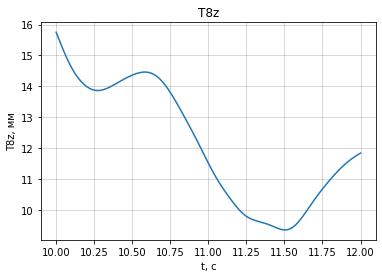

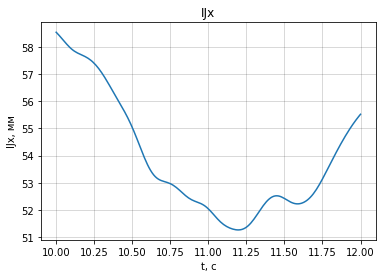

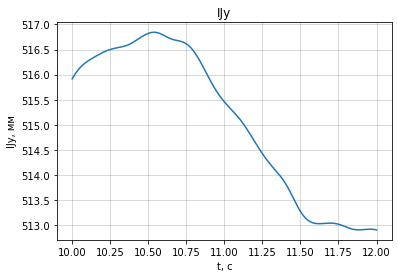

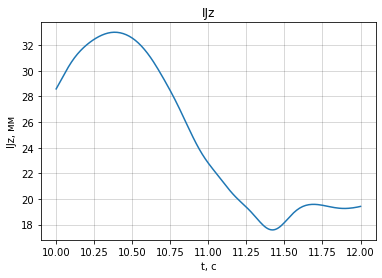

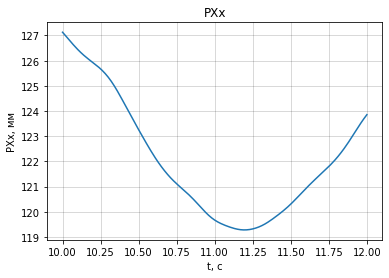

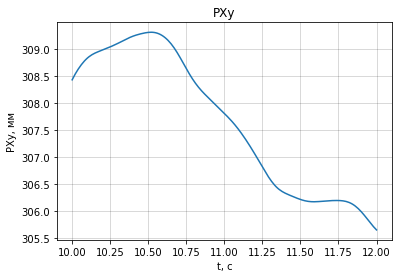

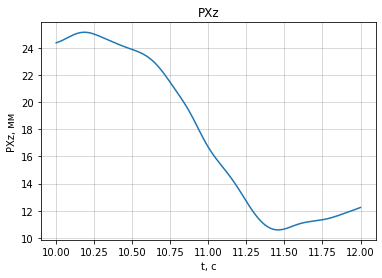

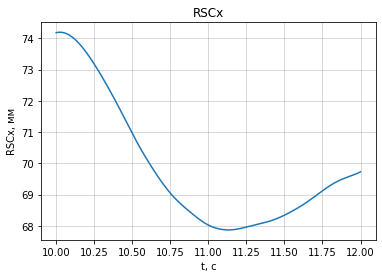

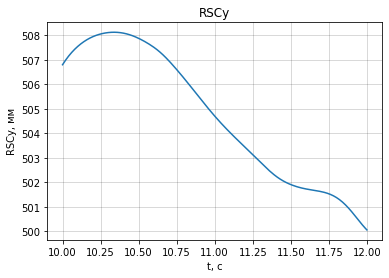

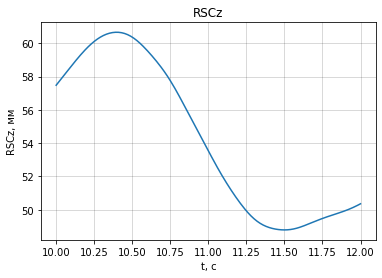

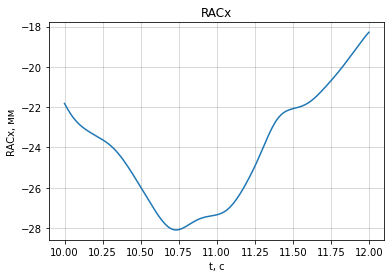

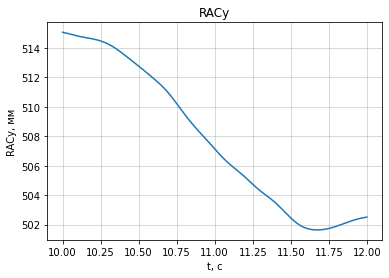

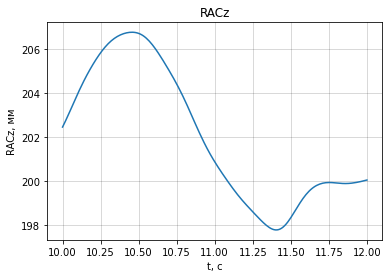

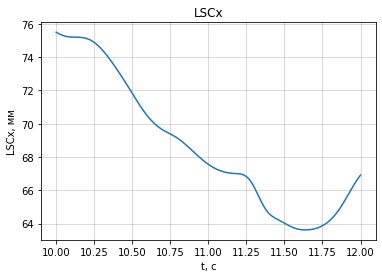

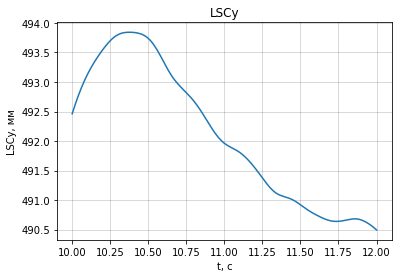

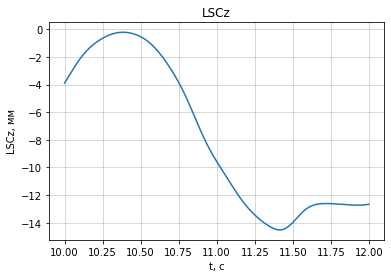

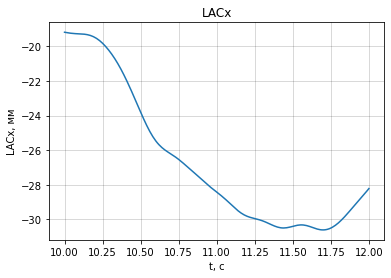

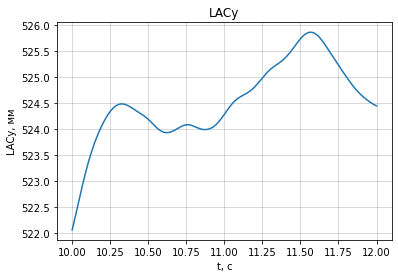

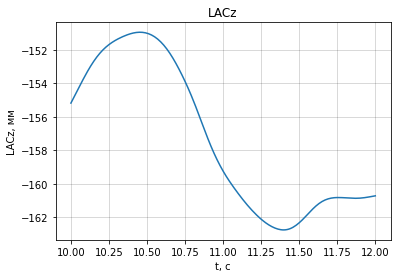

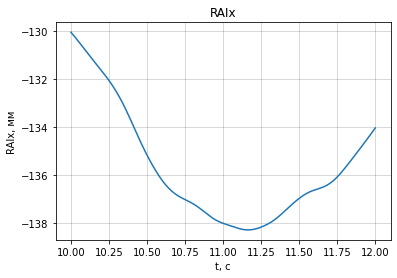

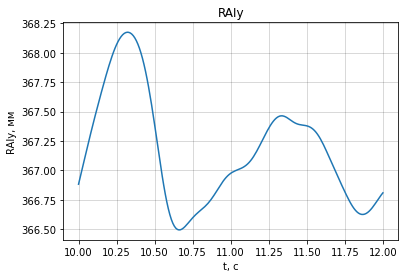

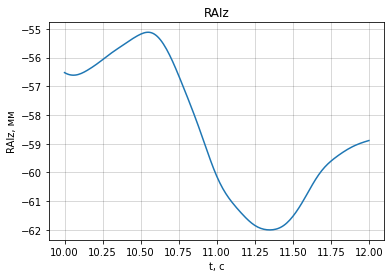

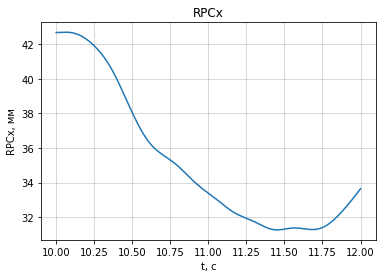

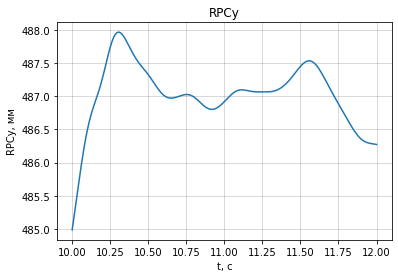

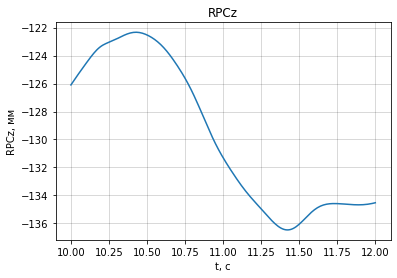

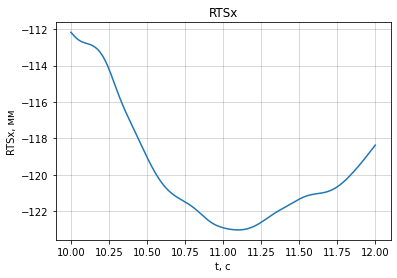

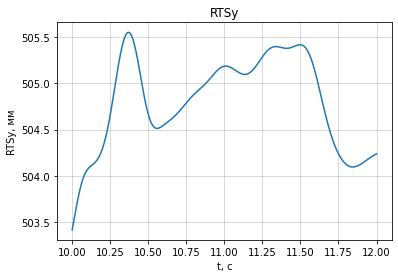

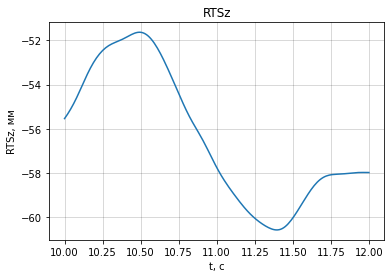

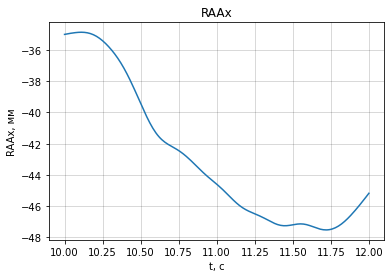

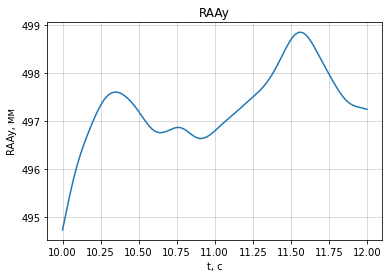

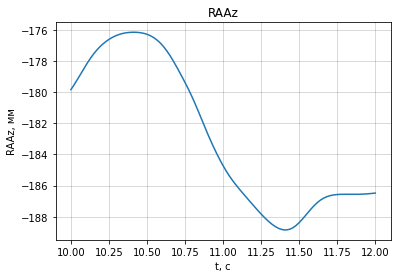

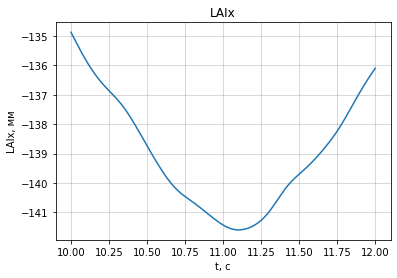

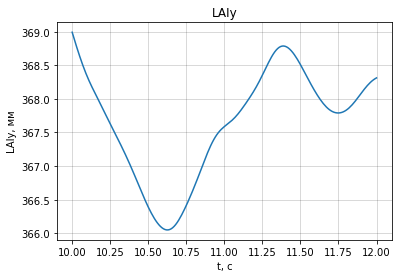

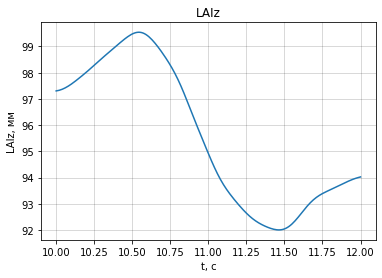

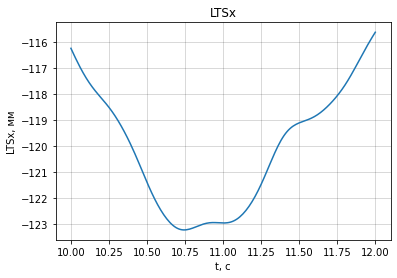

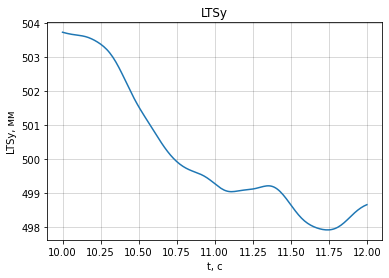

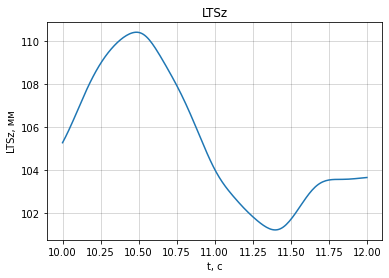

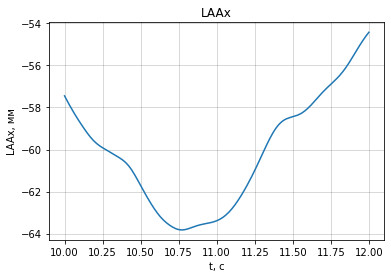

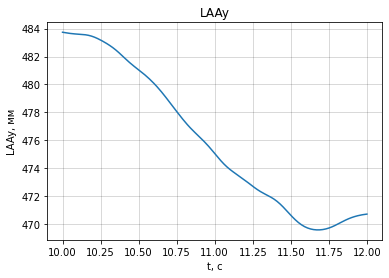

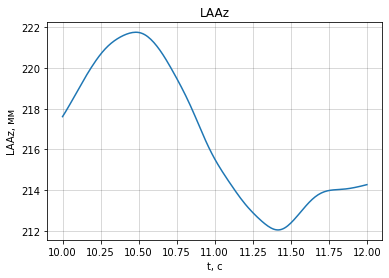

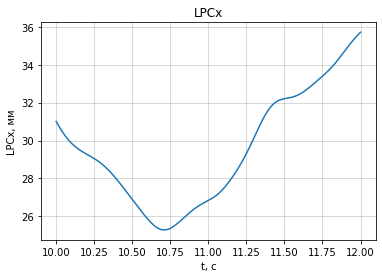

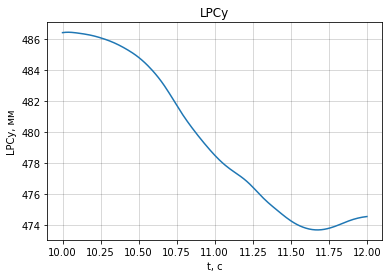

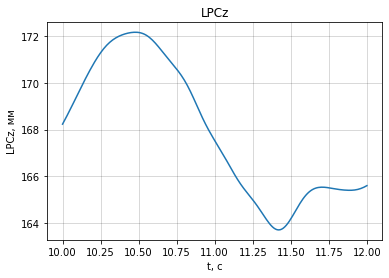

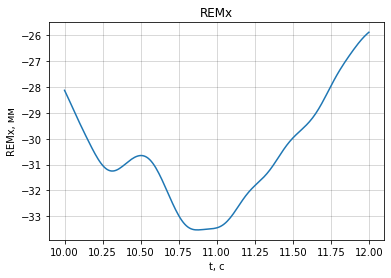

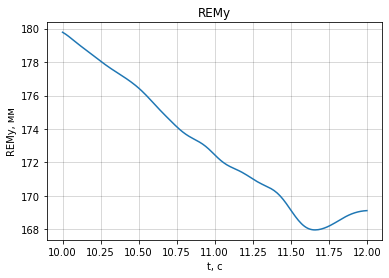

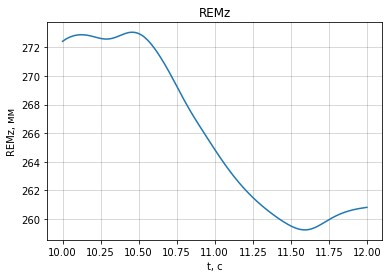

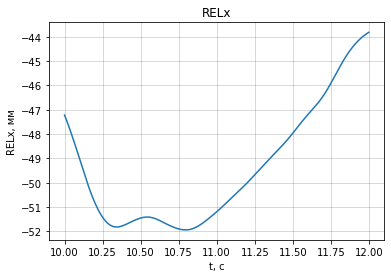

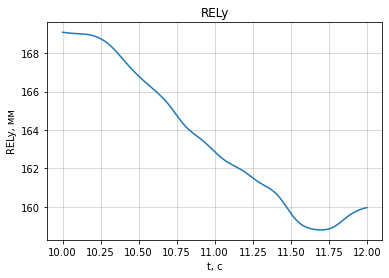

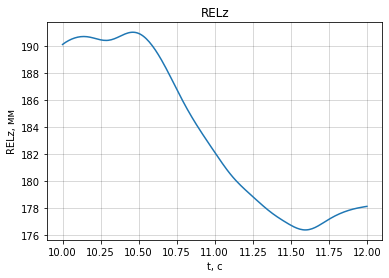

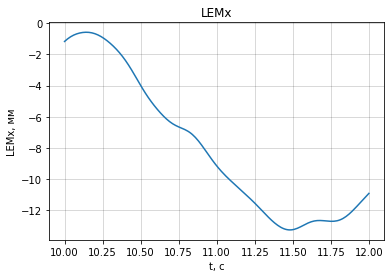

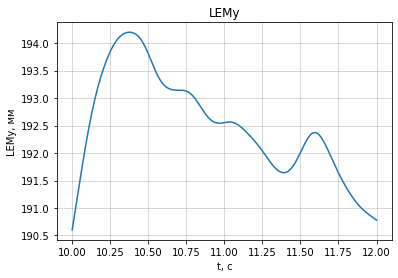

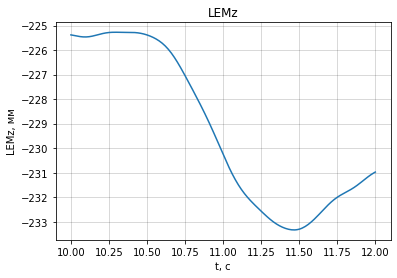

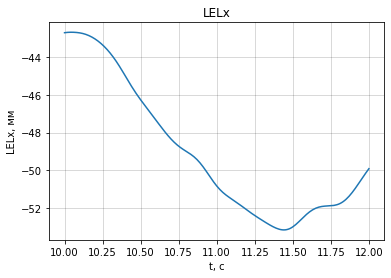

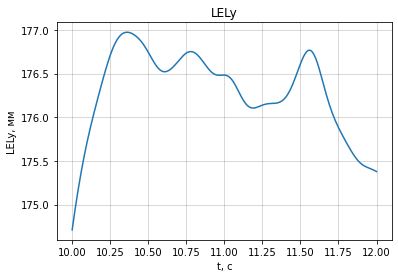

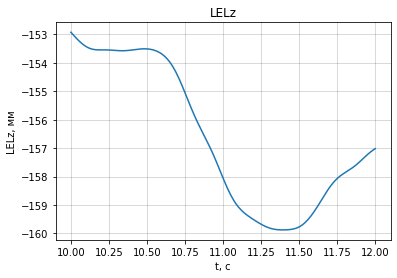

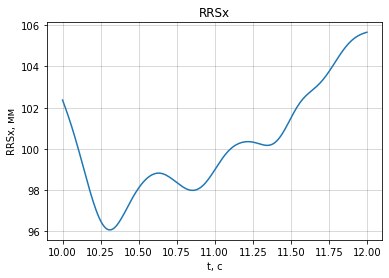

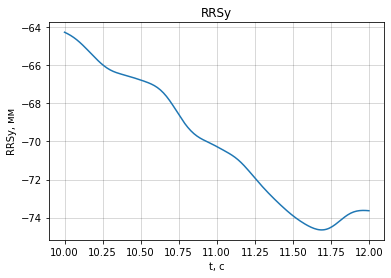

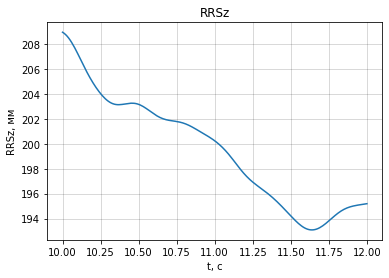

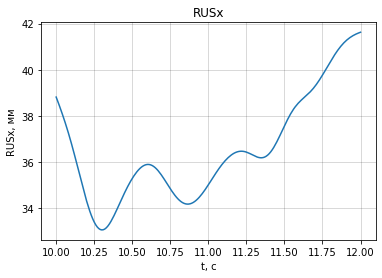

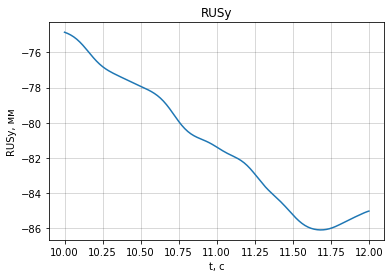

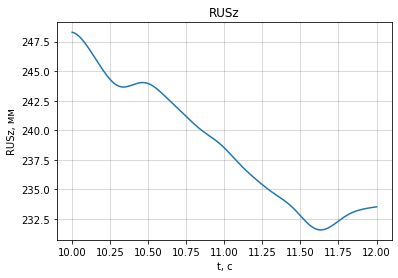

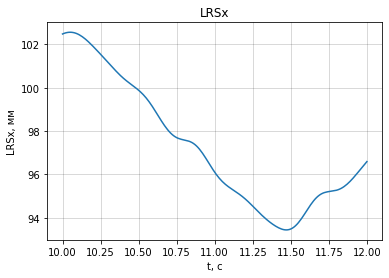

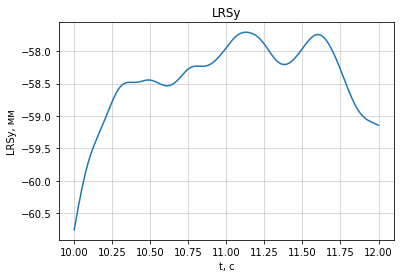

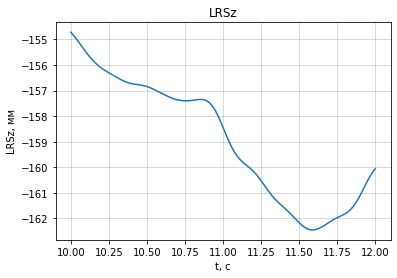

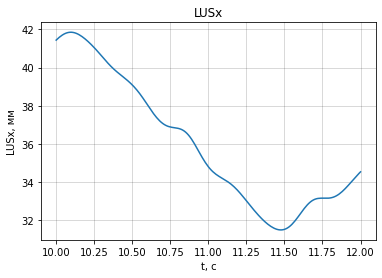

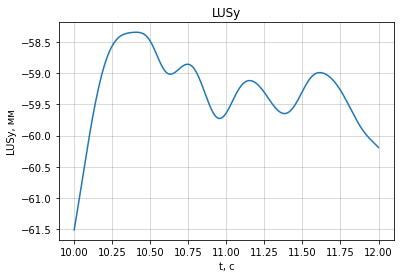

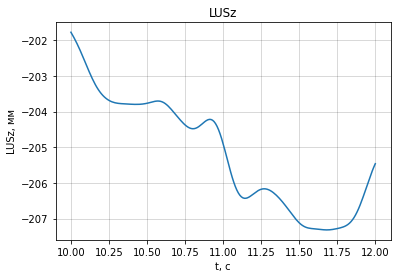

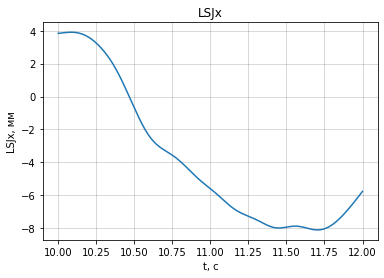

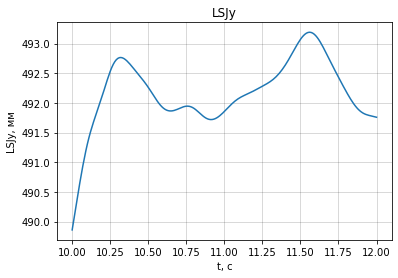

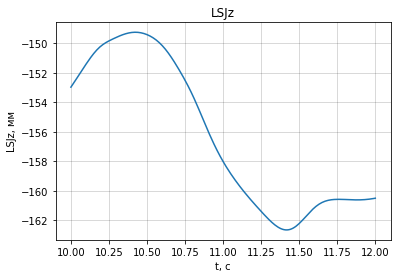

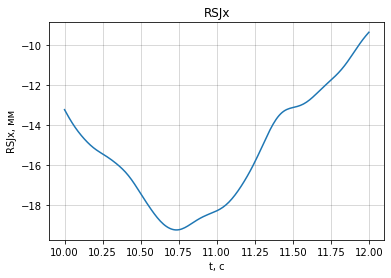

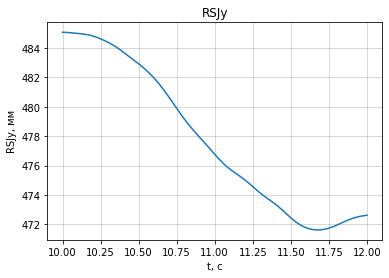

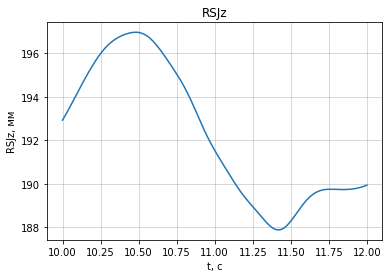

std of  C7x  equals  3.0425202845515193
std of  C7y  equals  1.1911014443429702
std of  C7z  equals  2.0637320829312595
std of  T8x  equals  2.5795547340155287
std of  T8y  equals  0.6204923779009494
std of  T8z  equals  1.9750629023552164
std of  PXx  equals  2.3454408983321615
std of  PXy  equals  1.2726133879953827
std of  PXz  equals  5.730756717365742
std of  IJx  equals  2.1686843565302825
std of  IJy  equals  1.5055709974352618
std of  IJz  equals  5.768361750933521


In [19]:
#Визуализация маркерных данных 
for i in cols: 
    fig, ax = plt.subplots()
    ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
    plt.title(i)
    ax.set_xlabel('t, с')
    ax.set_ylabel(i + ', мм')
    ax.plot(df1['Time'], df1[i])
    #ax.plot(df['Time'], df[i])
    plt.show()
for i in ['C7x', 'C7y','C7z', 'T8x', 'T8y','T8z', 'PXx', 'PXy', 'PXz', 'IJx', 'IJy', 'IJz']:
    print('std of ', i, ' equals ', df1[i].std())


**Вывод**. Все условно неподвижные маркеры сравнимы по дисперсии для неподвижной позы из 1.trc. Наиболее надежным по всем координатам является T8. Наименее надёжен C7.

Точность по x: T8, PX, IJ, C7; по y: T8, C7, IJ, PX; по z: T8, PX, IJ, C7.

In [14]:
#Код указывает смещение для маркеров для удобного отображения в Opensim
#average f1
avf1 = {}
for i in stablecols:
    avf1[i] = df1[i].values.mean()
#mean positions
meanx = 0.0
meany = 0.0
meanz = 0.0
for i in stablecols:
    if 'x' in i:
        meanx += avf1[i]
    elif 'y' in i:
        meany += avf1[i]
    elif 'z' in i:
        meanz += avf1[i]

meanx /= len(stablemarkers)
meany /= len(stablemarkers)
meanz /= len(stablemarkers)

Оси y в данных и в Opensim общие.
Необходимо повернуть относительно оси y маркеры на 90 градусов, чтобы ориентации совпали.

In [ ]:
"""
#rotate 270
#f2 contains rotated and shifted f1
df2 = df1.copy()
for i in markers:
    z1 = df2[i + 'x']
    x1 = -df2[i + 'z']
    df2[i + 'z'] = z1
    df2[i + 'x'] = x1

for i in markers:
    df2[i+'z'] += -meanx
    df2[i+'y'] += -meany + 430
    df2[i+'x'] += meanz 
"""

In [ ]:
#Запись повёрнутых данных
df2['Time'] = df2['Time'] - df2['Time'].values[0] + 0.01
df2['Frame#'] = df2['Frame#'] - df2['Frame#'].values[0] + 1
newinfolines = infolines
newinfolines[0] = "PathFileType\t4\t(X/Y/Z)\\" + file[0:-4] + 'mod.trc\n'
newinfolines[2] = '100\t100\t' + str(len(df2)+1) + '\t30\tmm\t100\t' + str(df2['Time'].values[0]) + '\t' + str(len(df2)+1) + '\n'
newtextlines = df2.to_csv(sep = '\t', header=False, index = False)
newtextlines = ''.join(newinfolines) + newtextlines
with open (file[0:-4] + 'mod.trc', 'w+') as fp:
    fp.write(newtextlines)

In [ ]:
fig, ax = plt.subplots()
ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
plt.title(i)
ax.set_xlabel('t')
ax.set_ylabel('marker')
ax.plot(df1['Time'], df1[i])
#plt.legend(loc = 'best')
plt.show()

Seth: The origin of the joint frame on the scapula is specified as the centroid of **AA, TS, AI** markers

In [ ]:
#Calculations in laboratory frame
#Coordinate of Scapula x, y, z
csx = np.zeros_like(df2[markersscap[0] + 'x'].values)
csy = np.zeros_like(csx)
csz = np.zeros_like(csx)
for i in markersscap:
    csx += np.array(df2[i + 'x'])
    csy += np.array(df2[i + 'y'])
    csz += np.array(df2[i + 'z'])
csx /= len(markersscap)
csy /= len(markersscap)
csz /= len(markersscap)

In [141]:
#calculations relatively the body. This approach is preferrable due to smaller errors and better view of an ellipsoid
csx = np.zeros_like(df2[markersscap[0] + 'x'].values)
csy = np.zeros_like(csx)
csz = np.zeros_like(csx)

#Still Subject coordinates in laboratory frame. Describes the movement of the point, which is still relatively the body
SSx = np.zeros_like(csx)
SSy = np.zeros_like(csx)
SSz = np.zeros_like(csx)

for i in stablecols:
    if 'x' in i:
        SSx += np.array(df2[i])
    elif 'y' in i:
        SSy += np.array(df2[i])
    elif 'z' in i:
        SSz += np.array(df2[i])

SSx /= len(stablecols) 
SSy /= len(stablecols)
SSz /= len(stablecols)

for i in markersscap:
    csx += np.array(df2[i + 'x']) - SSx
    csy += np.array(df2[i + 'y']) - SSy
    csz += np.array(df2[i + 'z']) - SSz
    
csx /= len(markersscap)
csy /= len(markersscap)
csz /= len(markersscap)



Далее заготовка кода для анализа мышц 

In [11]:
with open ('muscles.txt', 'r') as fp:
    muscles_list = fp.readlines()
for i in range(len(muscles_list)):
    muscles_list[i] = muscles_list[i][0:-1]

In [210]:
muscles_list = ['time', 'trap_cl', 'trap_acr_scap', 'trap_acr_T1', 'trap_acr_T2', 'trap_acr_T3', 'trap_inf_T4', 'trap_inf_T5', 'trap_inf_T6', 'trap_inf_T7', 'trap_inf_T8', 'trap_inf_T9', 'trap_inf_T10', 'trap_inf_T11', 'trap_inf_T12', 'trap_cl_L', 'trap_acr_scap_L', 'trap_acr_T1_L', 'trap_acr_T2_L', 'trap_acr_T3_L', 'trap_inf_T4_L', 'trap_inf_T5_L', 'trap_inf_T6_L', 'trap_inf_T7_L', 'trap_inf_T8_L', 'trap_inf_T9_L', 'trap_inf_T10_L', 'trap_inf_T11_L', 'trap_inf_T12_L', 'SerrAnt2_1_R', 'SerrAnt2_2_R', 'SerrAnt3_1_R', 'SerrAnt4_1_R', 'SerrAnt5_1_R', 'SerrAnt6_1_R', 'SerrAnt7_1_R', 'SerrAnt8_1_R', 'SerrAnt9_1_R', 'SerrAnt2_1_L', 'SerrAnt2_2_L', 'SerrAnt3_1_L', 'SerrAnt4_1_L', 'SerrAnt5_1_L', 'SerrAnt6_1_L', 'SerrAnt7_1_L', 'SerrAnt8_1_L', 'SerrAnt9_1_L', 'DELT1', 'DELT2', 'DELT3', 'DELT1_l', 'DELT2_l', 'DELT3_l', 'SUPSP', 'SUPSP_l', 'INFSP', 'INFSP_l', 'SUBSC', 'SUBSC_l', 'TMIN', 'TMIN_l', 'TMAJ', 'TMAJ_l', 'stern_mast', 'cleid_mast', 'stern_mast_L', 'cleid_mast_L', 'cleid_occ', 'cleid_occ_L', 'scalenus_ant', 'scalenus_med', 'scalenus_ant_L', 'scalenus_med_L', 'scalenus_post', 'scalenus_post_L', 'levator_scap1', 'levator_scap2', 'levator_scap3', 'levator_scap4', 'levator_scap1_L', 'levator_scap2_L', 'levator_scap3_L', 'levator_scap4_L', 'rhomb_C7', 'rhomb_T1', 'rhomb_T2', 'rhomb_T3', 'rhomb_T4', 'rhomb_T5', 'rhomb_C7_L', 'rhomb_T1_L', 'rhomb_T2_L', 'rhomb_T3_L', 'rhomb_T4_L', 'rhomb_T5_L', 'sternohyoid', 'sternohyoid_L', 'omohyoid_inf', 'omohyoid_inf_L', 'omohyoid_sup', 'omohyoid_sup_L', 'rectcap_post_maj', 'rectcap_post_maj_L', 'rectcap_post_min', 'rectcap_post_min_L', 'obl_cap_sup', 'obl_cap_sup_L', 'obl_cap_inf', 'obl_cap_inf_L', 'long_col_c1thx', 'long_col_c1thx_L', 'longissi_cerv_c4thx', 'longissi_cerv_c4thx_L', 'longissi_cap_c6', 'longissi_cap_c6_L', 'long_cap_c4', 'long_cap_c4_L', 'rect_cap_lat', 'rect_cap_lat_L', 'calcn_r_right_Fx', 'calcn_r_right_Fy', 'calcn_r_right_Fz', 'calcn_r_right_px', 'calcn_r_right_py', 'calcn_r_right_pz', 'calcn_r_right_Tx', 'calcn_r_right_Ty', 'calcn_r_right_Tz', 'calcn_l_left_Fx', 'calcn_l_left_Fy', 'calcn_l_left_Fz', 'calcn_l_left_px', 'calcn_l_left_py', 'calcn_l_left_pz', 'calcn_l_left_Tx', 'calcn_l_left_Ty', 'calcn_l_left_Tz']

In [212]:
#df хранит данные оригинального файла
mffile = 'SO_new\\4_1_75_scaled_opt_N2.osim_StaticOptimization_activation2'
mffile = 'SO_new\\final\\1\\4_1_75_scaled_opt_N2.osim_muscles_changed_StaticOptimization_force'
#mffile = 'SO_new\\4_1_75_scaled_opt_N2.osim_StaticOptimization_force1.sto'
#mafile = '\\SO\\1\\1_right_StaticOptimization_activation.sto'
mftextdatalines = ''
matextdatalines = ''
with open (mffile, 'r') as fp:
    mfdatalines = fp.readlines()
for i in mfdatalines[15:-1]:
    mftextdatalines += i + '\n'
mftextdatalines += mfdatalines[-1]
mdf = pd.read_csv(StringIO(mftextdatalines), sep = '\t', names = muscles_list, header = None)


In [213]:
mdf

,time,trap_cl,trap_acr_scap,trap_acr_T1,trap_acr_T2,trap_acr_T3,trap_inf_T4,trap_inf_T5,trap_inf_T6,trap_inf_T7,...,calcn_r_right_Tz,calcn_l_left_Fx,calcn_l_left_Fy,calcn_l_left_Fz,calcn_l_left_px,calcn_l_left_py,calcn_l_left_pz,calcn_l_left_Tx,calcn_l_left_Ty,calcn_l_left_Tz
0,0.80,0.430745,0.529410,3.672077,3.966210,4.376975,2.955506,5.058123,8.159467,14.728547,...,0.0,0.0,323.73,0.0,0.826212,0.833390,0.036379,0.0,0.0,0.0
1,0.85,51.528230,0.658810,0.921596,0.894174,1.023432,0.104397,0.301383,0.592815,0.889876,...,0.0,0.0,323.73,0.0,0.826097,0.833396,0.036377,0.0,0.0,0.0
2,0.90,62.114859,0.679653,1.104984,1.108568,1.355311,0.204213,0.515870,1.044393,1.408186,...,0.0,0.0,323.73,0.0,0.826015,0.833312,0.036377,0.0,0.0,0.0
3,0.95,55.376146,2.909021,2.954260,2.944384,3.082823,1.764231,2.550826,3.324231,4.044578,...,0.0,0.0,323.73,0.0,0.825849,0.833451,0.036292,0.0,0.0,0.0
4,1.00,0.898660,0.608710,0.974301,0.970692,1.174432,0.115123,0.361486,0.742023,1.076626,...,0.0,0.0,323.73,0.0,0.825742,0.833491,0.036219,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,3.70,0.465610,0.630804,1.008370,1.003520,1.191102,0.119449,0.344569,0.617241,1.021727,...,0.0,0.0,323.73,0.0,0.823476,0.834759,0.034175,0.0,0.0,0.0
59,3.75,0.602147,0.689450,1.121346,1.103487,1.310465,0.129000,0.358848,0.615441,0.971362,...,0.0,0.0,323.73,0.0,0.823415,0.834772,0.034281,0.0,0.0,0.0
60,3.80,0.736252,0.645580,1.024960,1.026418,1.234007,0.127873,0.371246,0.673832,1.096233,...,0.0,0.0,323.73,0.0,0.823282,0.834765,0.034361,0.0,0.0,0.0
61,3.85,45.566364,0.886599,1.319667,1.329442,1.613326,0.399276,0.672872,1.153230,1.626577,...,0.0,0.0,323.73,0.0,0.823178,0.834763,0.034508,0.0,0.0,0.0


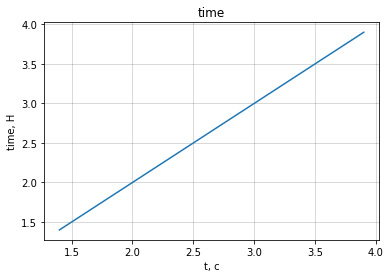

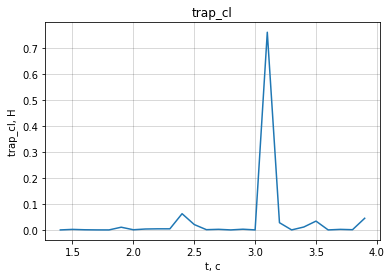

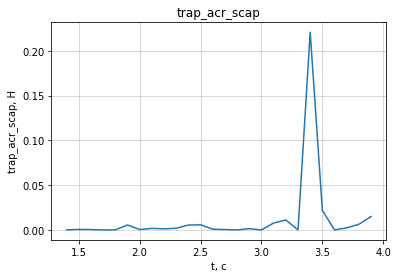

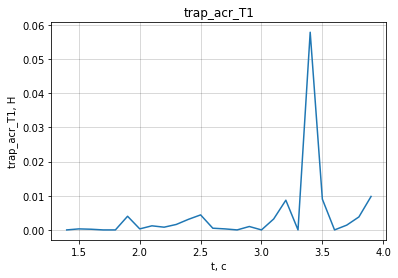

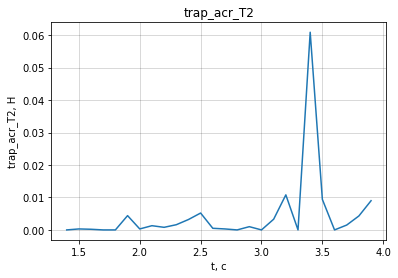

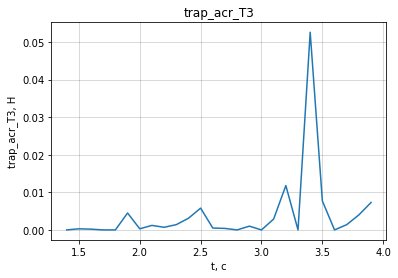

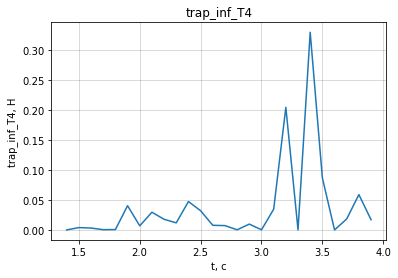

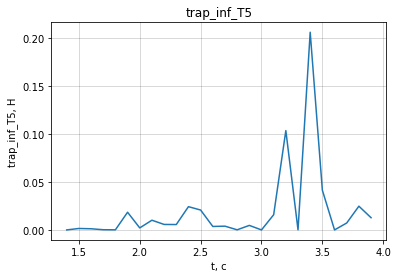

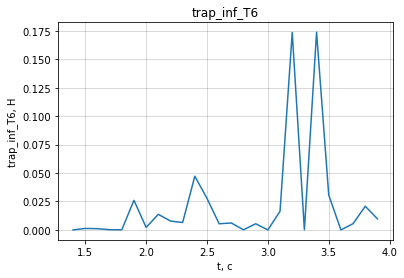

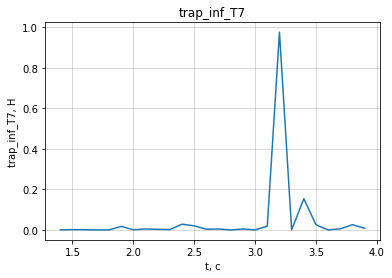

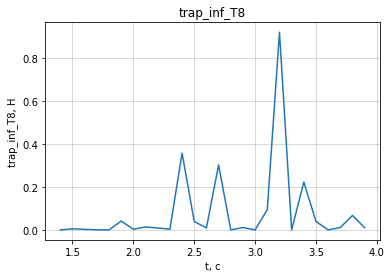

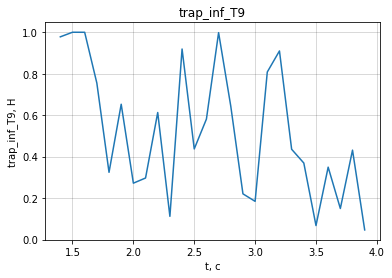

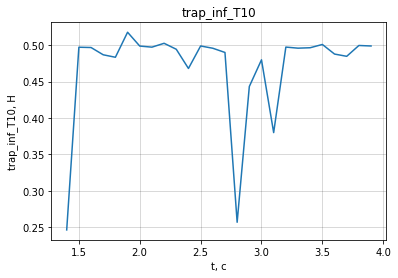

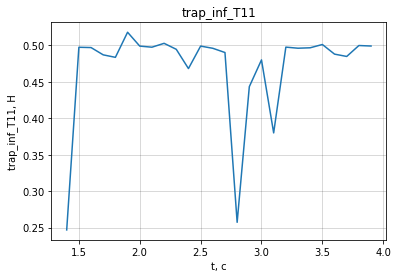

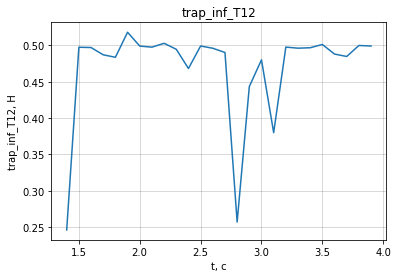

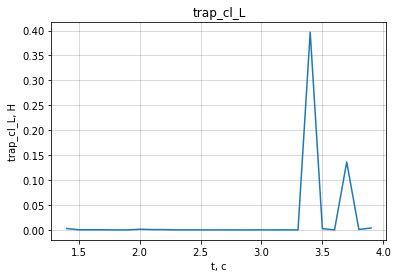

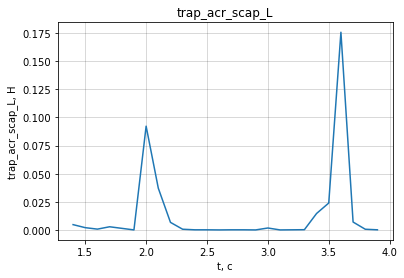

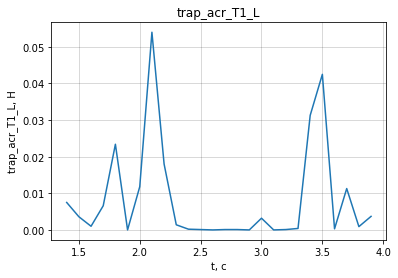

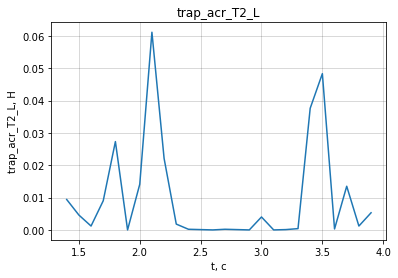

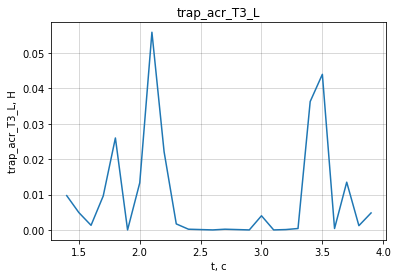

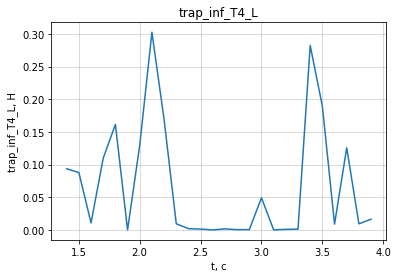

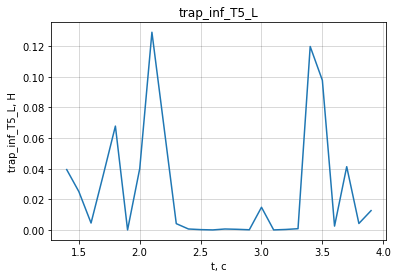

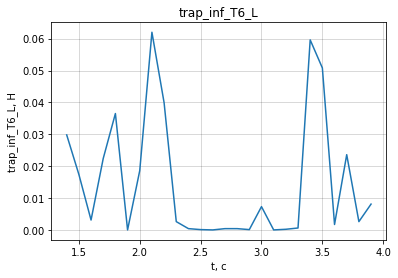

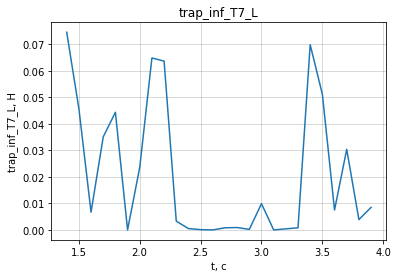

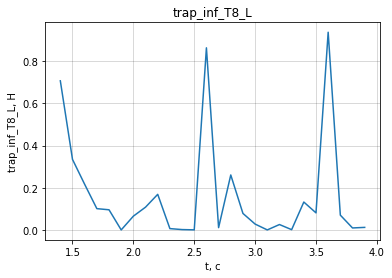

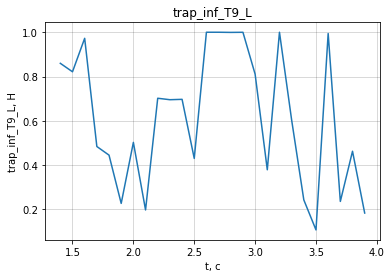

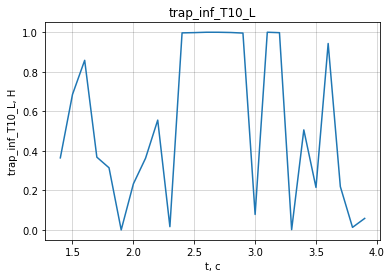

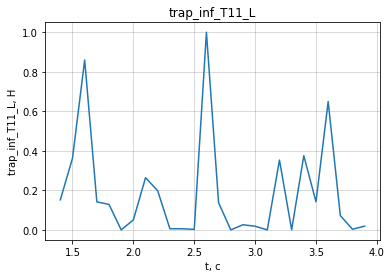

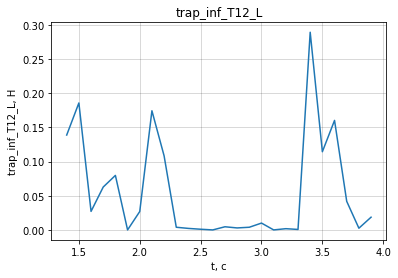

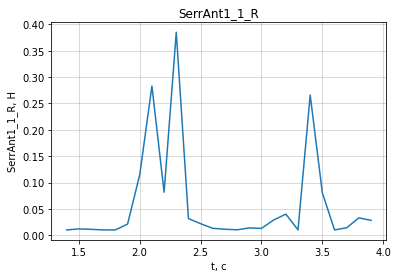

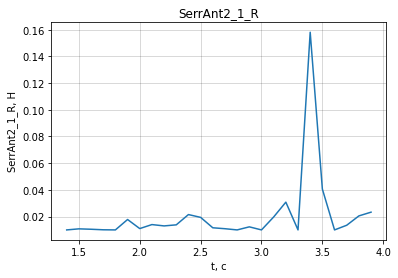

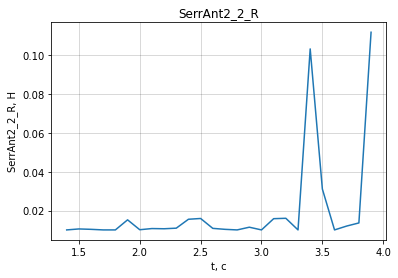

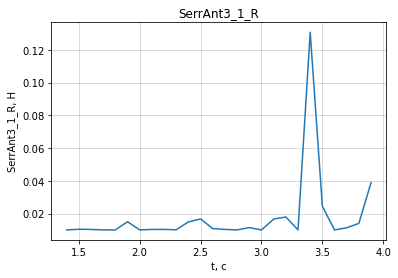

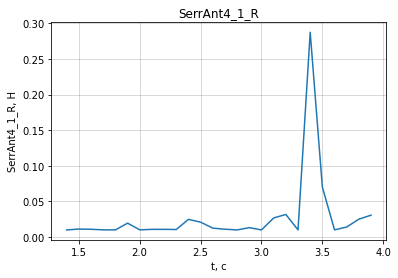

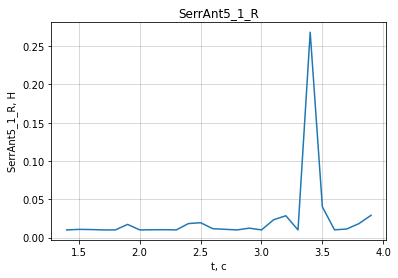

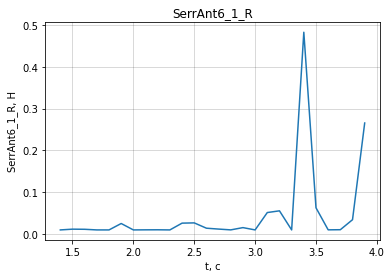

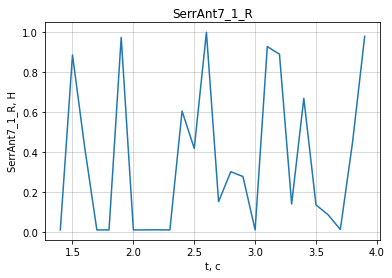

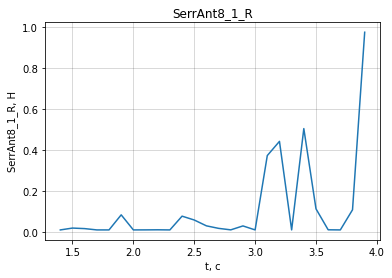

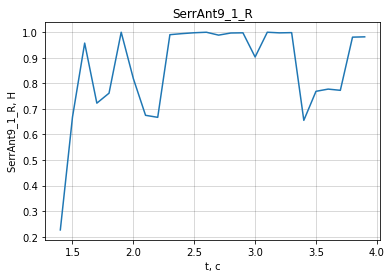

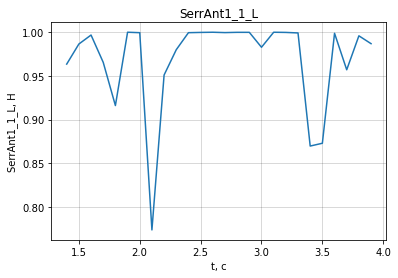

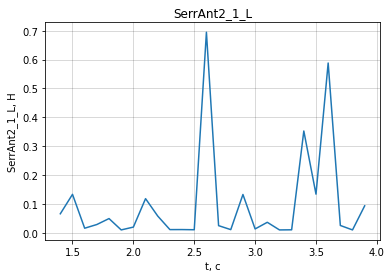

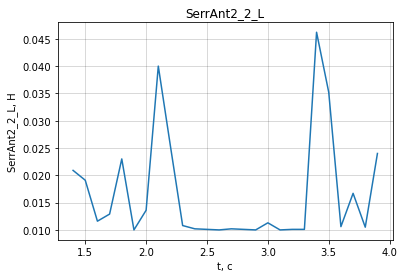

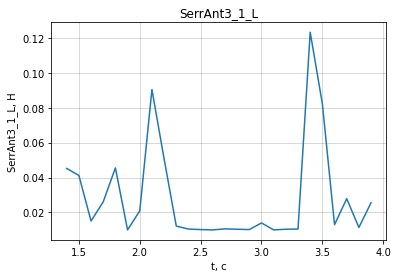

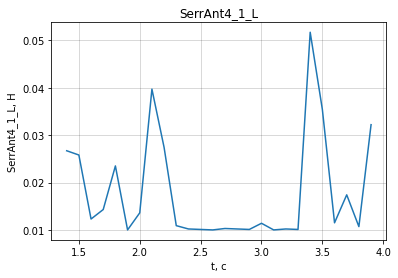

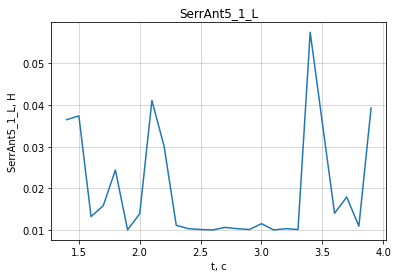

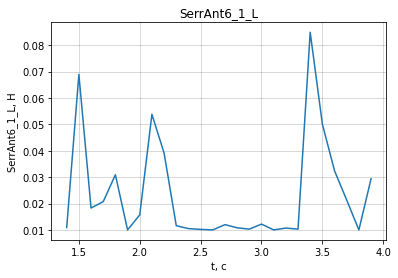

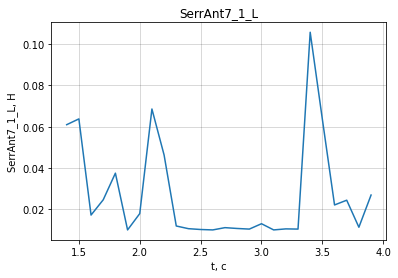

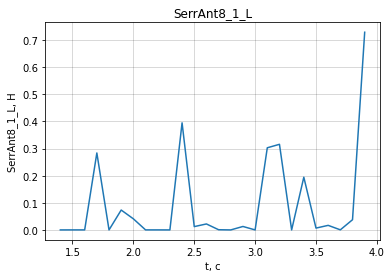

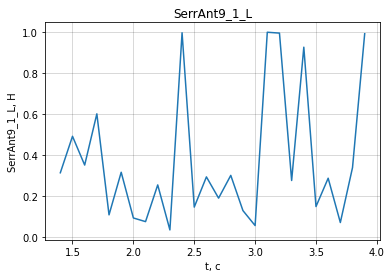

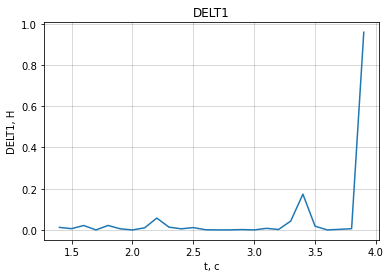

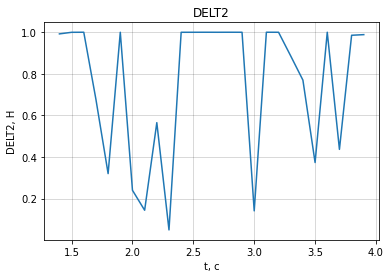

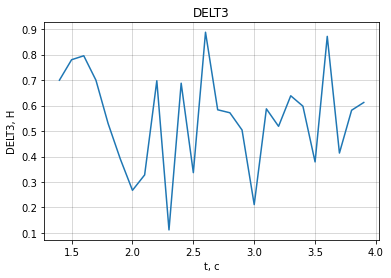

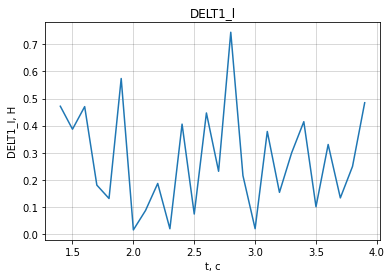

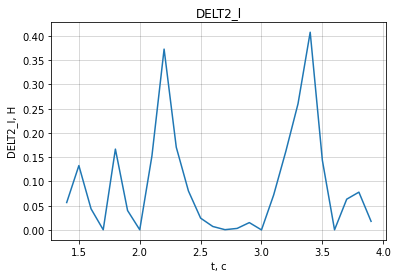

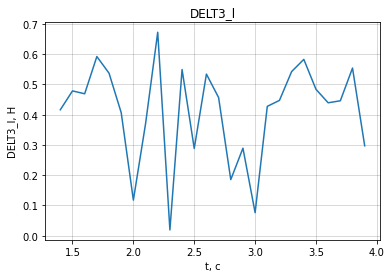

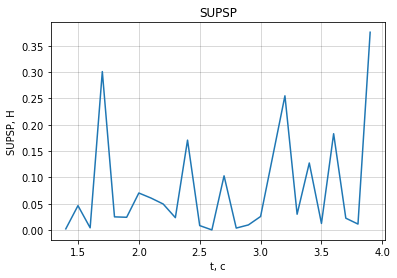

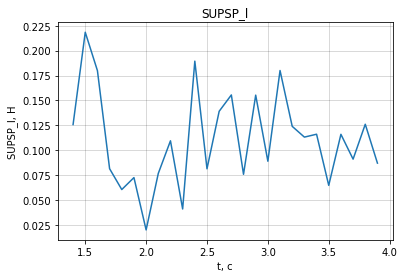

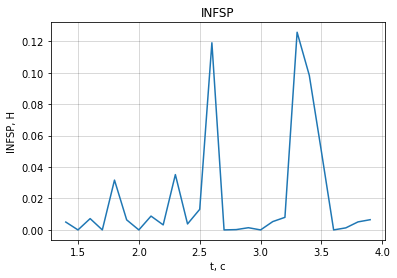

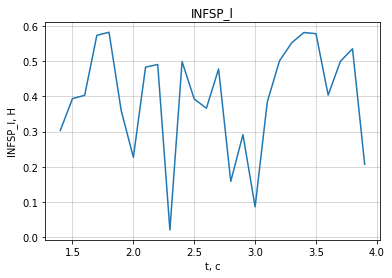

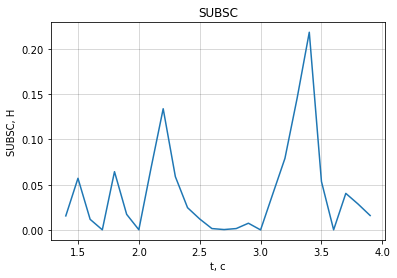

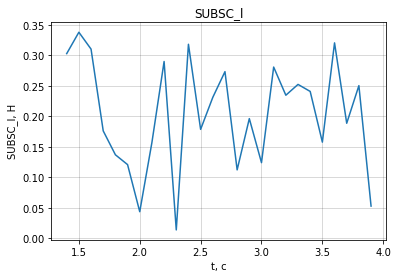

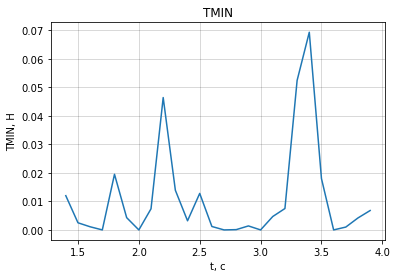

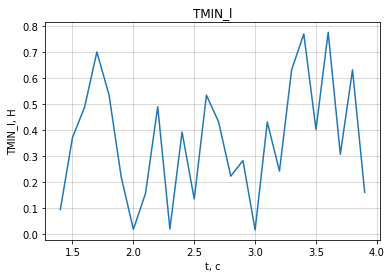

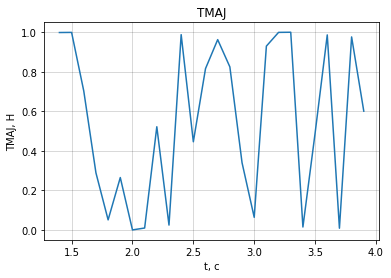

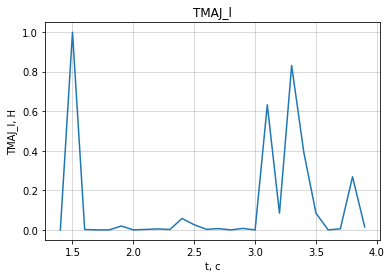

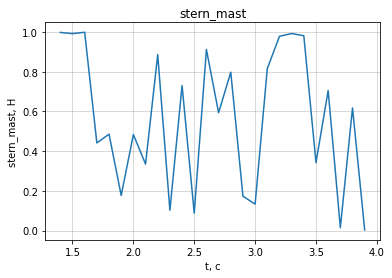

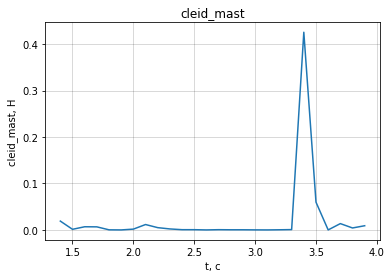

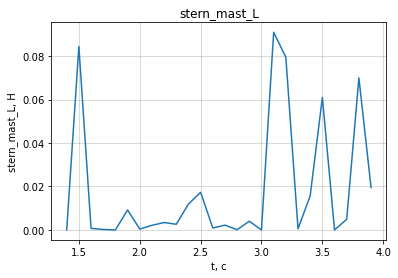

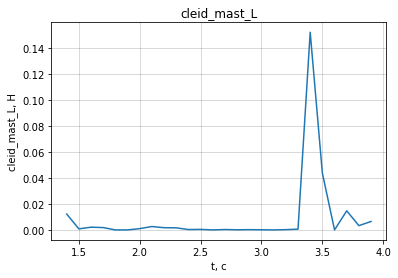

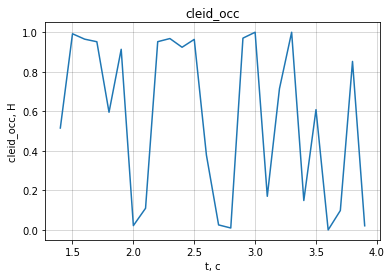

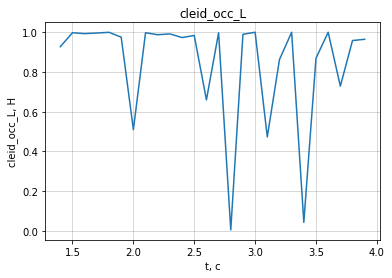

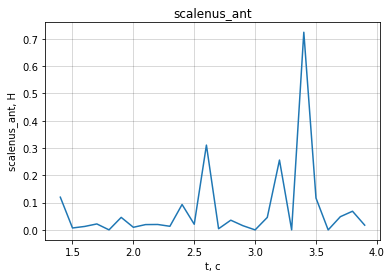

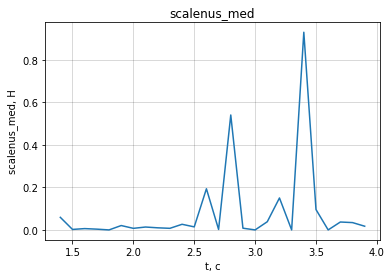

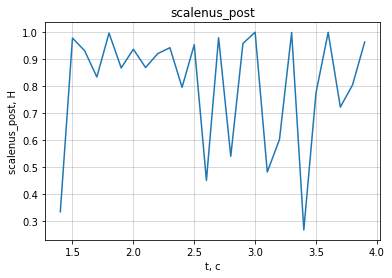

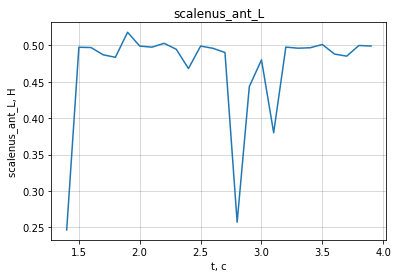

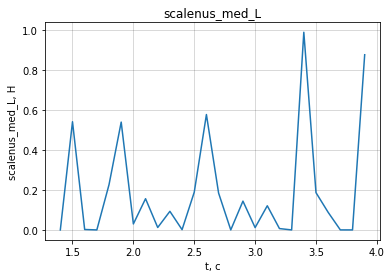

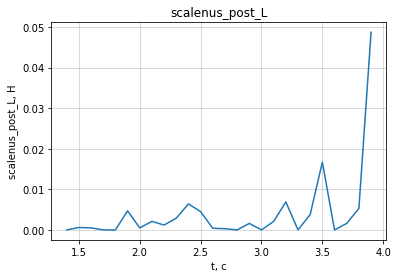

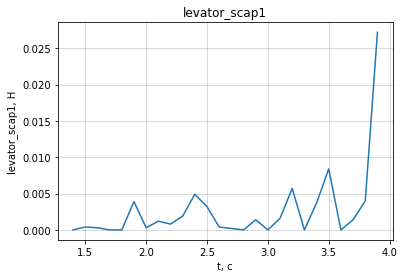

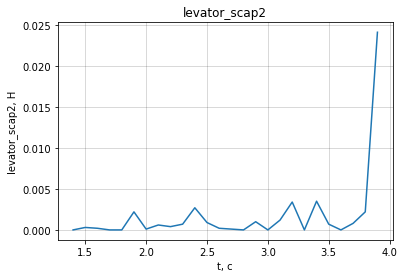

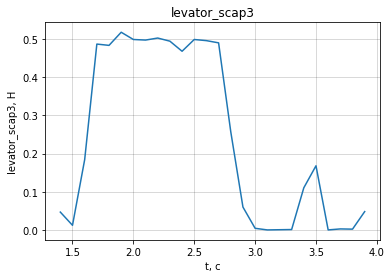

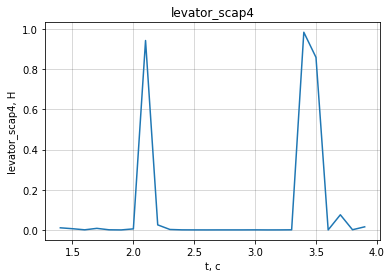

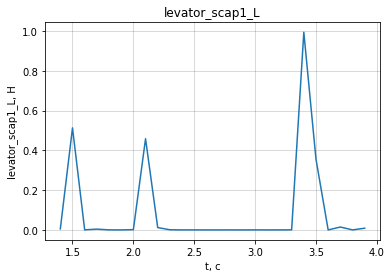

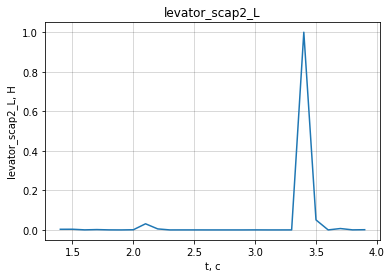

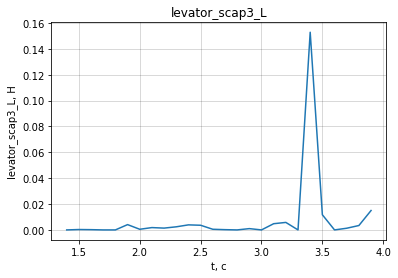

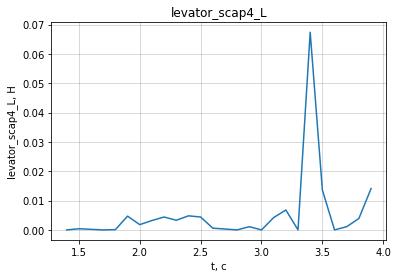

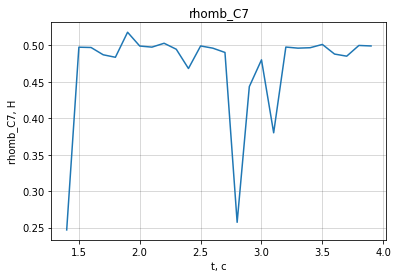

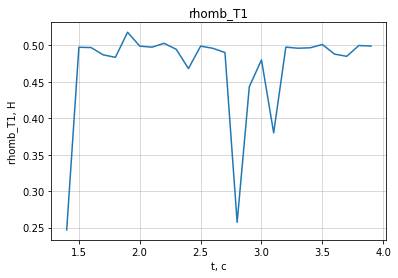

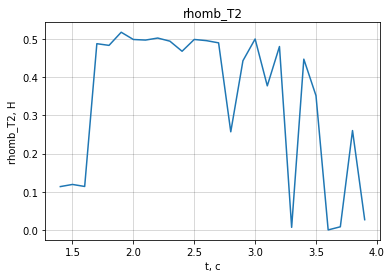

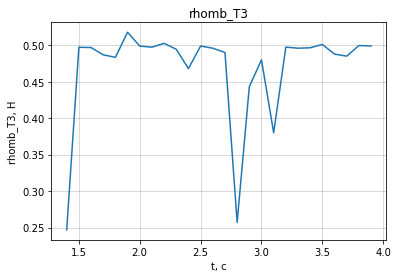

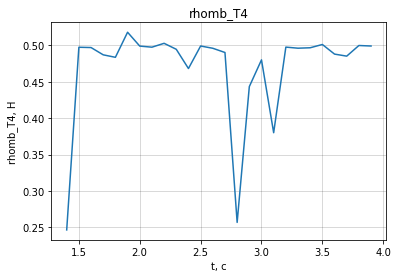

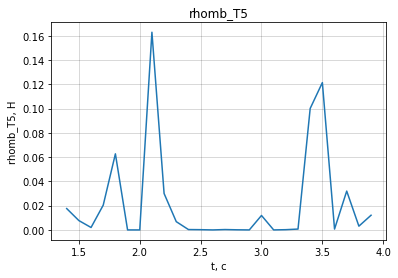

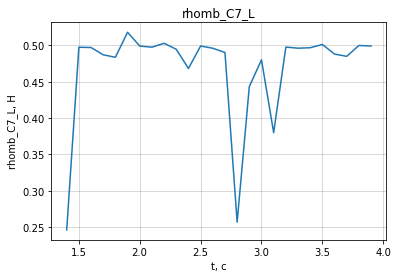

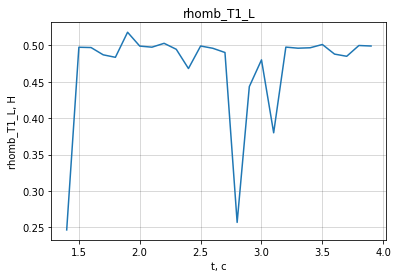

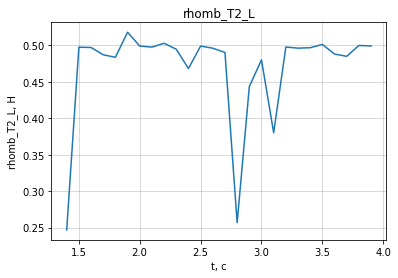

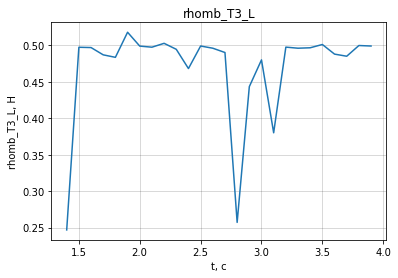

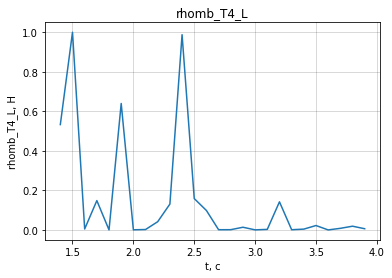

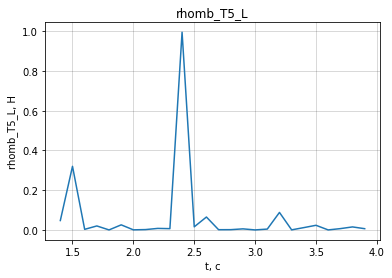

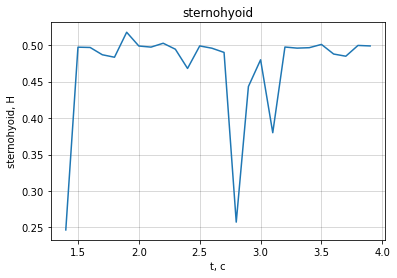

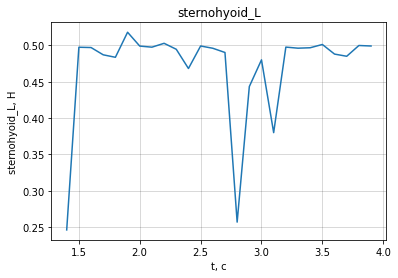

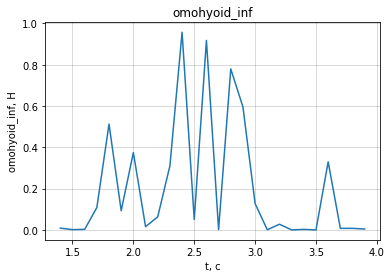

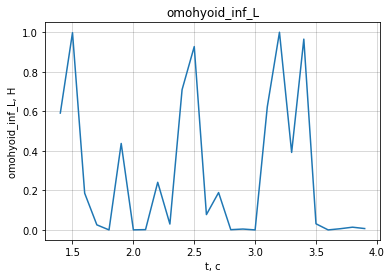

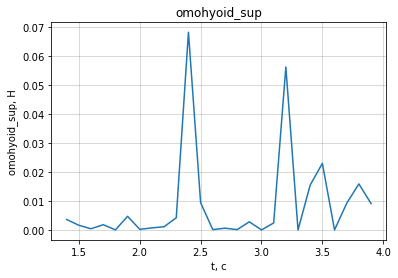

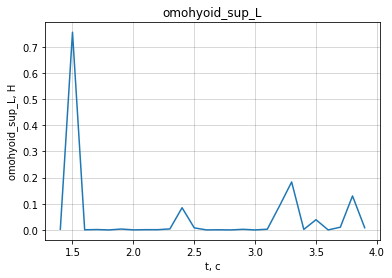

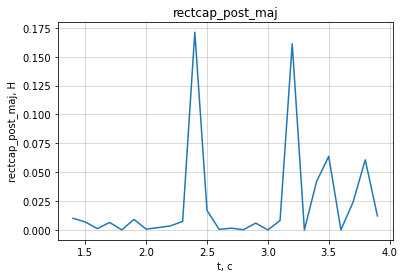

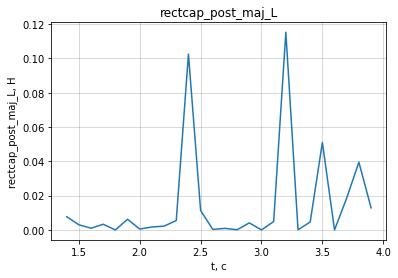

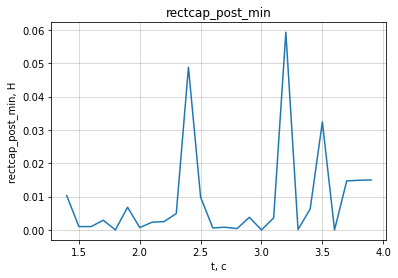

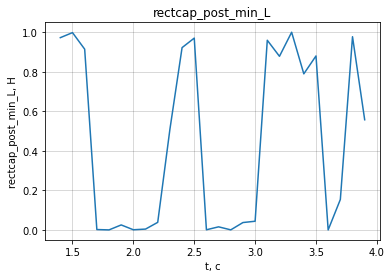

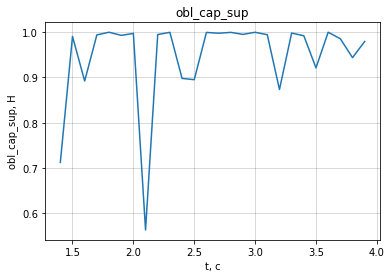

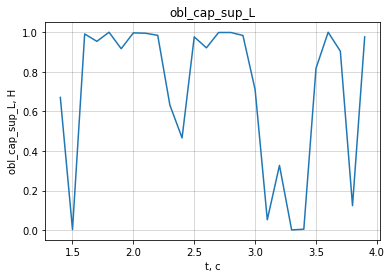

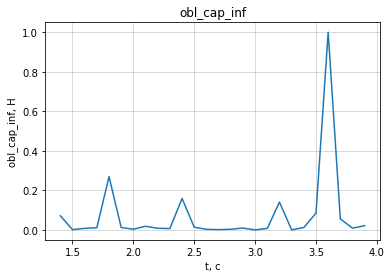

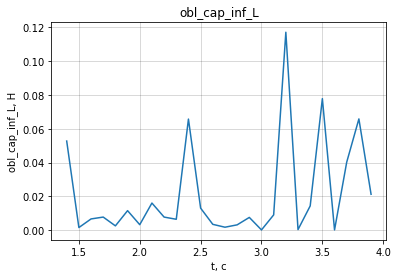

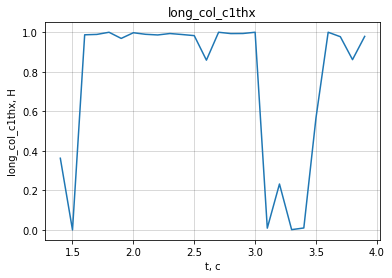

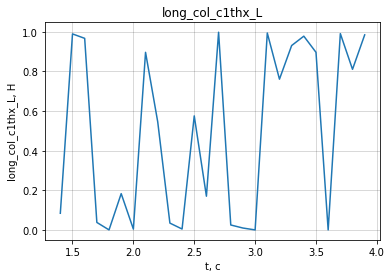

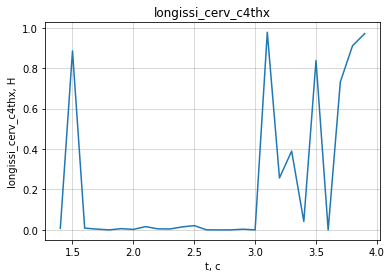

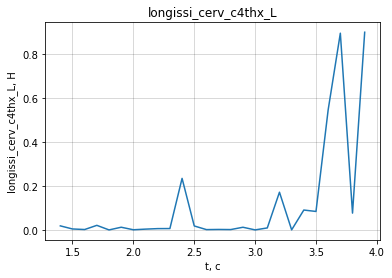

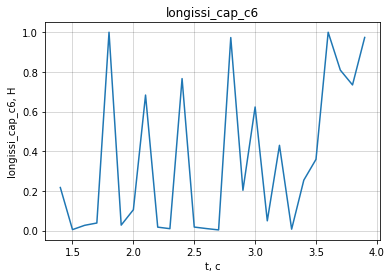

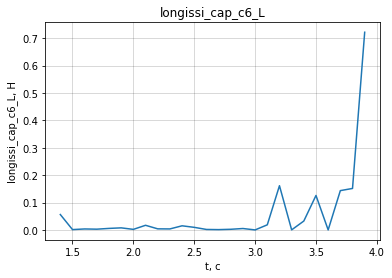

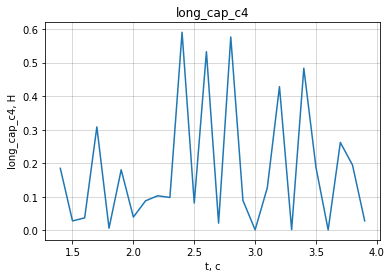

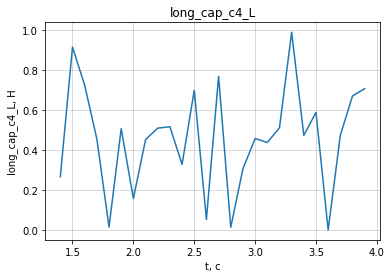

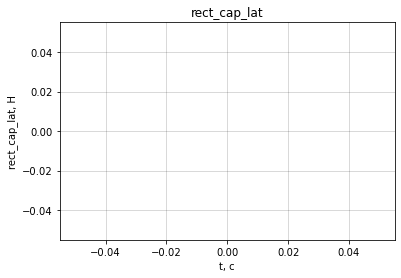

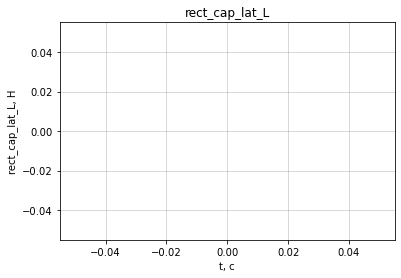

In [181]:
for i in muscles_list: 
    fig, ax = plt.subplots()
    ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
    ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
    plt.title(i)
    ax.set_xlabel('t, c')
    ax.set_ylabel(i + ', Н')
    ax.plot(mdf['time'], mdf[i])
    #ax.plot(df['Time'], df[i])
    plt.show()

In [183]:
df1 = mdf.copy()
df2 = df1.copy()
for i in range(15):
        for j in muscles_list:
            df2[j].values[1] = (df1[j].values[0] + df1[j].values[2]) / 2
            df2[j].values[2] = (df1[j].values[3] + df1[j].values[1] + df1[j].values[2]) / 3
            for k in range(3, df2.shape[0]-3):
                #df2[j].values[k] = (0.125 * df1[j].values[k-2] + 0.25 * df1[j].values[k-1] + 0.25 * 
                                    #df1[j].values[k] + 0.25 * df1[j].values[k+1] + 0.125 * df1[j].values[k+2])
                df2[j].values[k] = (0.05 * df1[j].values[k-3] + 0.1 * df1[j].values[k-2] + 0.23 * df1[j].values[k-1] +
                                 0.24 * df1[j].values[k] + 0.23 * df1[j].values[k+1] + 0.1 * df1[j].values[k+2] + 
                                 0.05 * df1[j].values[k+3])
            df2[j].values[-3] = (df1[j].values[-4] + df1[j].values[-3] + df1[j].values[-2]) / 3
            df2[j].values[-2] = (df1[j].values[-3] + df1[j].values[-1]) / 2
        df1 = df2.copy()    

In [193]:
muscle_groups = {}
muscle_groups['Trapezius'] = ['trap_cl', 'trap_acr_scap', 'trap_acr_T1', 'trap_acr_T2', 'trap_acr_T3', 'trap_inf_T4',
                              'trap_inf_T5', 'trap_inf_T6', 'trap_inf_T7', 'trap_inf_T8', 'trap_inf_T9', 'trap_inf_T10',
                              'trap_inf_T11', 'trap_inf_T12', 'trap_cl_L', 'trap_acr_scap_L', 'trap_acr_T1_L', 'trap_acr_T2_L',
                              'trap_acr_T3_L', 'trap_inf_T4_L', 'trap_inf_T5_L', 'trap_inf_T6_L', 'trap_inf_T7_L',
                              'trap_inf_T8_L', 'trap_inf_T9_L', 'trap_inf_T10_L', 'trap_inf_T11_L', 'trap_inf_T12_L']
muscle_groups['Serratus_Anterior'] = ['SerrAnt1_1_R', 'SerrAnt2_1_R', 'SerrAnt2_2_R', 'SerrAnt3_1_R', 'SerrAnt4_1_R',
                                      'SerrAnt5_1_R', 'SerrAnt6_1_R', 'SerrAnt7_1_R', 'SerrAnt8_1_R', 'SerrAnt9_1_R',
                                      'SerrAnt1_1_L', 'SerrAnt2_1_L', 'SerrAnt2_2_L', 'SerrAnt3_1_L', 'SerrAnt4_1_L',
                                      'SerrAnt5_1_L', 'SerrAnt6_1_L', 'SerrAnt7_1_L', 'SerrAnt8_1_L', 'SerrAnt9_1_L']
muscle_groups['Deltoid'] = ['DELT1', 'DELT2', 'DELT3', 'DELT1_l', 'DELT2_l', 'DELT3_l']
muscle_groups['Supraspinatus'] = ['SUPSP','SUPSP_l']
muscle_groups['Infraspinatus'] = ['INFSP', 'INFSP_l']
muscle_groups['Subscapularis'] = ['SUBSC', 'SUBSC_l']
muscle_groups['Teres_Minor'] = ['TMIN', 'TMIN_l']
muscle_groups['Teres_Major'] = ['TMAJ', 'TMAJ_l']
muscle_groups['Sternocleidomastoideus'] = ['stern_mast', 'cleid_mast', 'cleid_occ', 'stern_mast_L', 'cleid_mast_L',
                                           'cleid_occ_L']
muscle_groups['Scalenus'] = ['scalenus_ant', 'scalenus_med', 'scalenus_post', 'scalenus_ant_L', 'scalenus_med_L', 'scalenus_post_L']
muscle_groups['Levator_Spapulae'] = ['levator_scap1', 'levator_scap2', 'levator_scap3', 'levator_scap4', 'levator_scap1_L', 'levator_scap2_L',
                                     'levator_scap3_L', 'levator_scap4_L']
muscle_groups['Rhomboid'] = ['rhomb_C7', 'rhomb_T1', 'rhomb_T2', 'rhomb_T3', 'rhomb_T4', 'rhomb_T5', 'rhomb_C7_L', 'rhomb_T1_L', 'rhomb_T2_L',
                             'rhomb_T3_L', 'rhomb_T4_L', 'rhomb_T5_L']
muscle_groups['Obliqus Capitis'] = ['obl_cap_sup', 'obl_cap_sup_L', 'obl_cap_inf', 'obl_cap_inf_L']
#muscle_groups['Rectus Capitis'] = ['rectcap_post_maj', 'rectcap_post_maj_L', 'rectcap_post_min', 'rectcap_post_min_L',
                                  # 'rect_cap_lat', 'rect_cap_lat_L']
muscle_groups['Rectus Capitis'] = ['rectcap_post_maj', 'rectcap_post_maj_L', 'rectcap_post_min', 'rectcap_post_min_L']
                          
muscle_groups['Longissimus'] = ['longissi_cerv_c4thx', 'longissi_cerv_c4thx_L', 'longissi_cap_c6', 'longissi_cap_c6_L']
muscle_groups['Hyoid'] = ['sternohyoid', 'sternohyoid_L', 'omohyoid_inf', 'omohyoid_inf_L', 'omohyoid_sup', 'omohyoid_sup_L']
muscle_groups['Longus colli'] = ['long_col_c1thx', 'long_col_c1thx_L']